In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif



In [3]:
##The answer for the first question
data=pd.read_csv("/content/breast_cancer_csci4521.csv",header=None)
print(data.head(n=10))
#important variable in program
col_list=data.columns# list of the columns
row_list=data.index # list of the row indexes






         0  1      2      3       4       5        6        7        8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760      NaN   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4  84358402  M  20.29    NaN  135.10  1297.0      NaN  0.13280  0.19800   
5    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
6    844359  M  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270   
7  84458202  M  13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366   
8    844981  M  13.00  21.82   87.50   519.8      NaN  0.19320      NaN   
9  84501001  M  12.46  24.04   83.97   475.9  0.11860  0.23960      NaN   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  

In [4]:
#answer second question
samples,features=data.shape
print("Samples:",samples,"Features:",features)


Samples: 569 Features: 32


In [5]:
#answer for third question
data_used=data[col_list[2:]]
print(data_used.head(n=6))
print("mean of data:\n")
print(data_used.mean(),"\n")
print("standard deviation of data:\n")
print(data_used.std(),"\n")
print("min of data:\n")
print(data_used.min(),"\n")
print("max of data:\n")
print(data_used.max(),"\n")


      2      3       4       5        6        7       8        9       10  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760     NaN  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29    NaN  135.10  1297.0      NaN  0.13280  0.1980  0.10430  0.1809   
5  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578  0.08089  0.2087   

        11  ...     22     23      24      25      26      27      28      29  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869     NaN   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0

In [6]:
num_missing = (data.isnull()).sum()

# Question 3 answers
#values represented as Nan
for i in range(0,len(col_list)):
  if num_missing[col_list[i]]>0:
    print(col_list[i],"has",num_missing[col_list[i]],"missing values\n")


2 has 95 missing values

3 has 98 missing values

6 has 61 missing values

8 has 77 missing values

12 has 29 missing values

13 has 53 missing values

14 has 76 missing values

16 has 12 missing values

19 has 45 missing values

20 has 23 missing values

22 has 27 missing values

24 has 62 missing values

27 has 7 missing values

29 has 68 missing values

30 has 20 missing values



In [7]:
#Question 4

data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,NaN,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,NaN,0.6638,0.17300
4,84358402,M,20.29,NaN,135.10,1297.0,NaN,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,NaN,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,NaN,0.19320,NaN,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,NaN,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [8]:
#Question 4
data.fillna(data_used.median(), inplace = True)

In [9]:
#Question 4
data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.118400,0.27760,0.06168,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.142500,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.1017,0.6638,0.17300
4,84358402,M,20.29,18.75,135.10,1297.0,0.095955,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1017,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.127800,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.094630,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.118900,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.095955,0.19320,0.06168,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.118600,0.23960,0.06168,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


<ipython-input-10-ce6ff91ce6c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used[data_used_cols[i]]=SD_data[:,i]


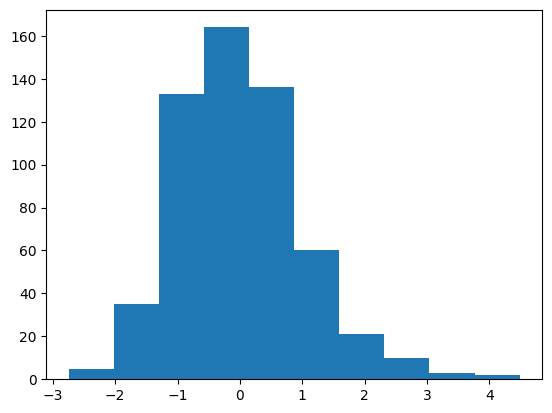

In [10]:
#Standardize question 5
Scalar=StandardScaler()
data_used=data[col_list[2:]]
SD_data=Scalar.fit_transform(data_used)
data_used_cols=data_used.columns

for i in range(0,len(data_used_cols)):
  data_used[data_used_cols[i]]=SD_data[:,i]


plt.hist(data_used[10])
plt.show()
data[col_list[2:]]=data_used


In [11]:
data.head(n=10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,1.202173,-2.254784,1.269934,0.984375,1.654470,3.283515,-0.312539,2.532475,...,1.992524,-1.359293,2.462782,2.001237,1.307686,2.647038,2.109526,2.471938,2.792154,1.937015
1,842517,M,1.983101,-0.363846,1.685955,1.908708,-0.888374,-0.487072,0.027222,0.548144,...,1.908540,-0.369203,1.654219,1.890489,-0.375612,-0.425209,-0.146749,1.181350,-0.248735,0.281190
2,84300903,M,1.716738,0.526609,1.566503,1.558884,0.989674,1.052926,1.515870,2.037231,...,1.602754,-0.023974,1.456779,1.456285,0.527407,1.100652,0.854974,2.107843,1.169032,0.201391
3,84348301,M,-0.786469,0.303996,-0.592687,-0.764464,3.475104,3.402909,2.108634,1.451707,...,-0.262114,0.133984,-0.223965,-0.550021,3.394275,3.934303,1.989588,-0.188884,6.138611,4.935010
4,84358402,M,1.898350,-0.113085,1.776573,1.826229,-0.041137,0.539340,1.523953,1.428493,...,1.380951,-1.466770,1.447377,1.220724,0.220556,-0.307194,0.613179,-0.188884,-0.882870,-0.397100
5,843786,M,-0.474703,-0.893513,-0.387148,-0.505650,2.364593,1.244335,0.982382,0.824656,...,-0.141522,-0.313836,-0.081997,-0.244320,2.048513,1.744606,1.263243,0.987925,1.780167,2.241802
6,844359,M,1.280872,0.201644,1.138125,1.095295,-0.141234,0.088295,0.374798,0.646935,...,1.454167,0.322883,1.478717,1.275220,0.518640,0.030176,0.509552,1.298381,0.265472,-0.014730
7,84458202,M,-0.093320,0.419141,-0.072867,-0.218965,1.692243,1.140102,0.118293,0.281950,...,0.200873,0.401048,0.143648,0.028859,1.447961,0.739551,-0.021054,0.687221,0.483970,1.726435
8,844981,M,-0.308226,0.672460,-0.184080,-0.384207,-0.041137,1.684010,-0.312539,1.150692,...,-0.137215,0.822813,0.005754,-0.248363,1.662757,1.842097,1.280035,1.506435,2.425802,1.288650
9,84501001,M,-0.471676,1.240509,-0.329482,-0.509063,1.669579,2.563358,-0.312539,0.941760,...,-0.223352,2.443109,-0.262200,-0.297409,2.320295,5.163844,3.995433,1.750249,2.406088,6.846856


In [12]:
var_threshold = 0.1

data_var = data_used.var()


# get features with low variance question 6
print(data[16].var())
for i in range(0,len(data_used_cols)):
  if data_var[data_used_cols[i]]<var_threshold:
    print(data_used_cols[i],"has low variance")
    data.drop(data_used_cols[i],axis=1,inplace=True)

data[col_list[2:]]=data_used


0.0
16 has low variance


In [13]:
#get duplicates and delete them question 7

dup=data.duplicated()
print(dup)
if dup.any():
    print(data[dup])
data_used.drop_duplicates(inplace = True)


data[col_list[2:]]=data_used




0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool


<ipython-input-13-1b3dfc46f49a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_used.drop_duplicates(inplace = True)


In [14]:

data_used=data[col_list[2:]]
data_std = data_used.std()
data_mean = data_used.mean()
cut_off = data_std * 3
#the upper and lower were decide by any data points which were over three standard deviaitions over the mean
lower, upper = data_mean - cut_off, data_mean + cut_off

col_list=data.columns
row_list=data.index

lower=lower.to_numpy()
upper=upper.to_numpy()
outliers =[]

#find outliers and delete them question 8

for i in range(2,len(col_list)):
  for j in range(0,len(row_list)):
    if float(data[col_list[i]][row_list[j]]) < lower[0] or float(data[col_list[i]][row_list[j]]) > upper[0]:
      outliers.append(j)

outliers = np.unique(outliers)

print("outliers:",outliers)
print("number of outliers:",len(outliers))

data.drop(outliers,axis='index',inplace=True)
data.drop(16,axis=1,inplace=True)



outliers: [  0   3   9  12  14  23  25  31  35  38  42  60  68  71  72  78  82  83
 105 108 112 119 122 138 146 151 152 176 180 181 190 199 202 203 212 213
 214 219 232 236 239 258 259 265 272 288 290 314 318 323 339 351 352 368
 370 376 379 388 389 400 416 417 430 461 473 503 504 505 520 521 559 561
 562 563 567 568]
number of outliers: 76


anova feature scores:
Feature 0: 421.0168113889116
Feature 1: 84.03256478087066
Feature 2: 655.1673892724932
Feature 3: 627.3866076660361
Feature 4: 46.63586207512292
Feature 5: 279.5573266960414
Feature 6: 455.5639418558197
Feature 7: 839.1291942033781
Feature 8: 47.14257141169063
Feature 9: 2.5198039895740005
Feature 10: 293.99771425388263
Feature 11: 0.061069574262044624
Feature 12: 248.7384231709152
Feature 13: 476.3778056047059
Feature 14: 46.48917522973792
Feature 15: 81.4459762987031
Feature 16: 112.53856221157275
Feature 17: 6.748478031973779
Feature 18: 6.459462513658339
Feature 19: 761.92217383664
Feature 20: 115.48810526469221
Feature 21: 694.5617163878438
Feature 22: 819.5997274620557
Feature 23: 93.32200871853814
Feature 24: 247.76174664715992
Feature 25: 447.03054503483315
Feature 26: 575.0444119980083
Feature 27: 88.64943025286296
Feature 28: 54.96485099609761


features kept:  0
features kept:  2
features kept:  3
features kept:  6
features kept:  7
features kept:  13
f

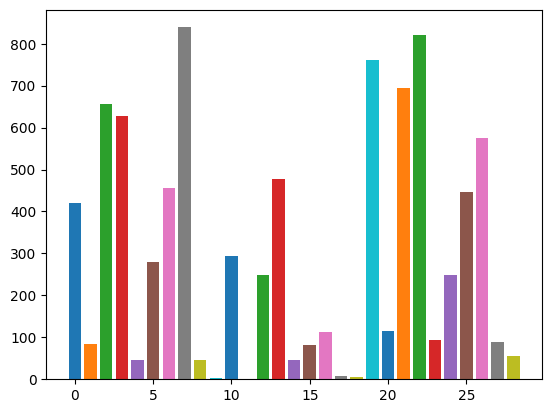

In [15]:
#Question 9
y=data[1]# target variable to compare
x=data.drop([0,1],axis=1)
fs = SelectKBest(score_func = f_classif, k = len(x.columns) )

fs.fit(x,y)

print("anova feature scores:")
mean_fs=fs.scores_.mean()

for i in range(len(fs.scores_)):
    print(f"Feature {i}: {fs.scores_[i]}")

print("\n")
# plot the scores
for i in range(0,len(fs.scores_)):
  if fs.scores_[i]>=0:
    plt.bar(i,fs.scores_[i])
#Criteri to remove is any importance scores that are less than the mean scores
for j in range(0,len(fs.scores_)):
  if fs.scores_[j]<mean_fs:
    data.drop(col_list[j],axis=1,inplace=True)
  else:

    print("features kept: ",j)
plt.show()



In [16]:
sample,feat=data.shape
print(sample,feat)

493 13
